# Introduction
Machine Learning is a on everyone's lips the world over. Almost everyone I talk to is fascinated by the subject and believes it's going to be a core around which our lives will revolv in the not-so-distant future, a belief I personally share. 

## What is Machine Learning?
When I first encountered machine learning while in university a couple of years ago I had the same question -- what on earth is machine learning? Machine learning is basically teaching computers to learn patterns in data without being explicitly programmed to learn them, and make predictions and decisions from the patterns learnt. 

## What I'm going to do
Over the coming months I'm going to learning a bit more about the subject and I will be working on projects to try and hone my skills. For every project I will create a `Jupyter` notebook where I will be explaining how to use various machine learning algorithms to create useful models. The notebooks are sort of my personal notes since I will be writing as I learn.

# Iris dataset
This is probably the most common dataset in the world. It is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper **The use of multiple measurements in toxomic problems**. It consists of 50 samples from each of three species of Iris(Iris Setosa, Iris Virginica and Iris Versicolor). Four features were measured for each sample: `sepal length`, `sepal width`, `petal length` and `petal width`. We are going to train some models that will be able to say whether a given observation is a Setosa, Virginica or Versicolor.

This is a classification problem where we have a finite number of classes (three) for our target variable (Species).

The dataset used here was downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)
Let's get started.

# Taking a quick look at the data
Before we begin we want to take a look at our data and see how it looks and maybe clean it up if need be. We are going to import some libraries that are going to help us perform some analysis on the data

In [11]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
# Load data
df = pd.read_csv('iris.csv')

Now that we have loaded our data into a `Pandas` DataFrame `df` let's have a quick glance on the first few rows to see how the data looks.

In [13]:
# Look at the first 5 rows of the dataset
df.head()

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


From the above table we can see that our data contains 5 columns : `SepalLength`, `SepalWidth`, `PetalLength`, `PetalWidth` and `Species`

Now let's see how many of each species is in the dataset.

In [14]:
# Get total number of each species
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Now let's plot a scatter plot to see the relationships between `SepalLength` and `SepalWidth` for each of the three species.

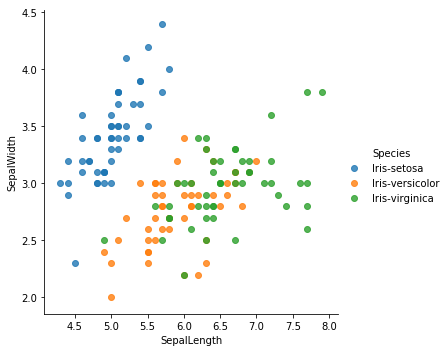

In [15]:
sns.lmplot(x='SepalLength', y='SepalWidth', data=df, hue='Species', fit_reg=False)

What can we see from this plot? Iris setosa seems to have relatively wide sepals.

Now let's do the same for `PetalLength` and `PetalWidth`:

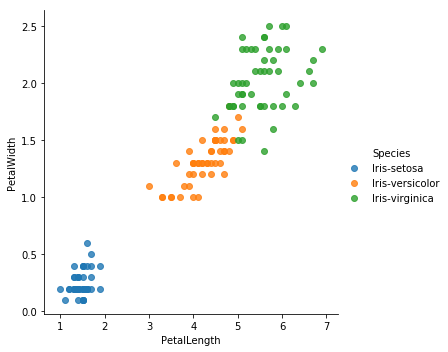

In [16]:
sns.lmplot(x='PetalLength', y='PetalWidth', data=df, hue='Species', fit_reg=False)

We can see clear clusters in the plot above. The Iris setosa species seems to have relatively short and narrow petals.

## Non-numeric values
The `Species` column contains non-numeric values. Most machine learning algorithms don't support non-numeric values so we need to replace them with numeric values.

In [17]:
# Replace non-numeric values with numeric values
species = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df = df.replace({'Species': species})
df.head()

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


As you can see now the `Species` column has numeric values. Now let's see the relationship between the other columns and the species:

In [18]:
# compute correlation
corr_matrix = df.corr()
corr_matrix ['Species'].sort_values(ascending=False)

Species        1.000000
PetalWidth     0.956464
PetalLength    0.949043
ID             0.942830
SepalLength    0.782561
SepalWidth    -0.419446
Name: Species, dtype: float64

Petal width and petal length have the most influence on the species prediction.

## Let's train some models
Now that we have an idea of how our data looks let's get started.

In [19]:
# drop the ID column
df.drop('ID', axis=1, inplace=True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Support Vector Machine
This is a **supervised learning** algorithm that can be used for both **classification** and **regression** problems but is mostly used in classification problems. 

The algorithm creates a line or `hyperplane` that seperates the data into classes. The hyperplane is drawn in such a way that we get the widest possible gap between the classes. 

In [20]:
# Import libraries
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [25]:
Y = df['Species']
X = df.drop('Species', axis=1)

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
# create model
model = SVC()

In [30]:
# train the model
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now that our model is trained let's use it to make predictions using `x_test`

In [31]:
pred = model.predict(x_test)

Let's see how well our model performed.

In [33]:
# get classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.93      0.88      0.90        16
           3       0.87      0.93      0.90        14

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## Making sense of the classification report
Now that we have the classification report let's see what all these numbers mean. 
### Precision
It shows what percentage of the model's predictions were correct. It is the ability of a model not to label something as positive when it's actually negative.

Let `TP = True Positive` and `FP = False Positive`
Then Precision = `TP/(TP + FP)`

The precision value is shown for all the classes 1: Iris-setosa, 2: Iris-versicolor, 3: Iris-virginica

### Recall
It shows the percentage of positive cases the model managed to get. It is the ability of a model to find all positive instances.
Let `FN = False Negatives`
Recall = `TP/(TP + FN)`

### F1-Score
It is a weighted harmonic mean of precision and recall such that the best score is 1 and the worst is 0

`F1 Score = 2 * (Recall * Precision)/ (Recall + Precision)`

Let's also check the accuracy of the model

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9333333333333333
